# Front page example (XGBoost)

The code from the front page example using XGBoost.

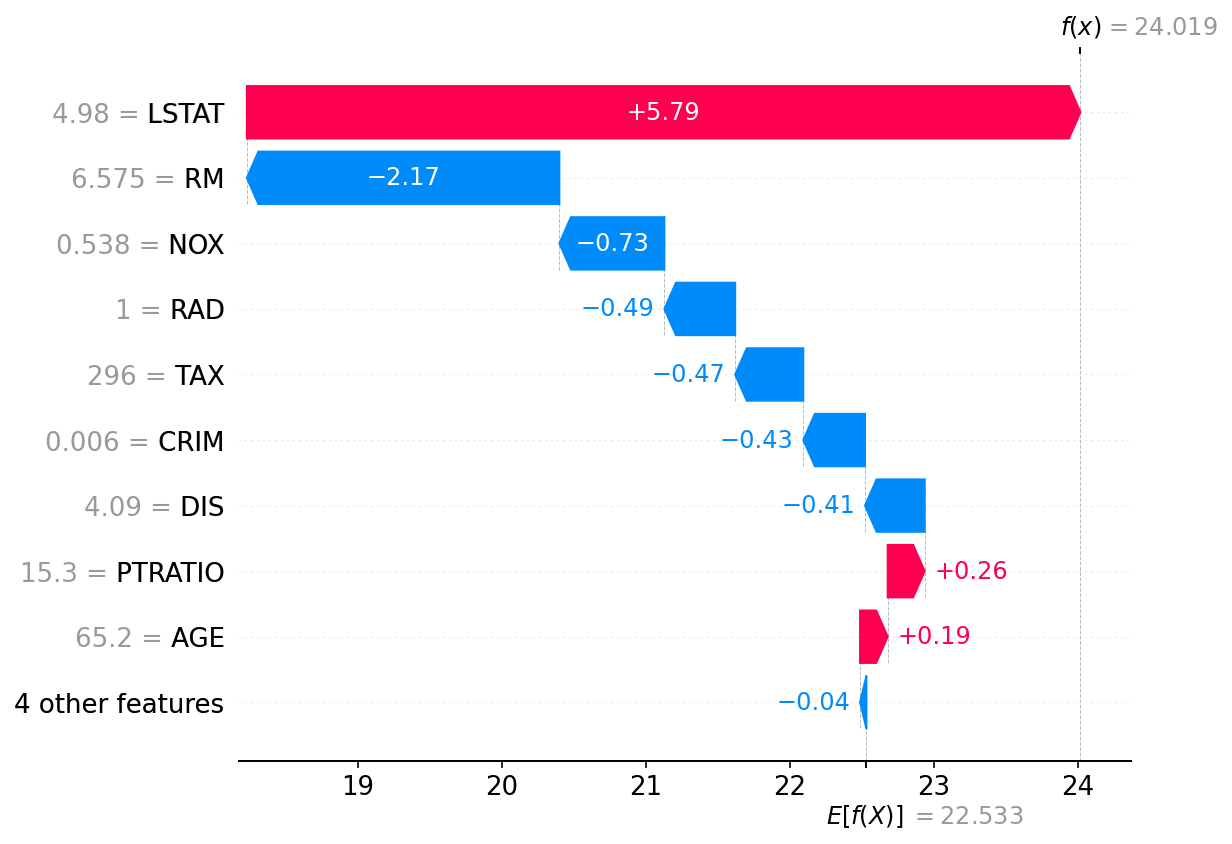

In [1]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

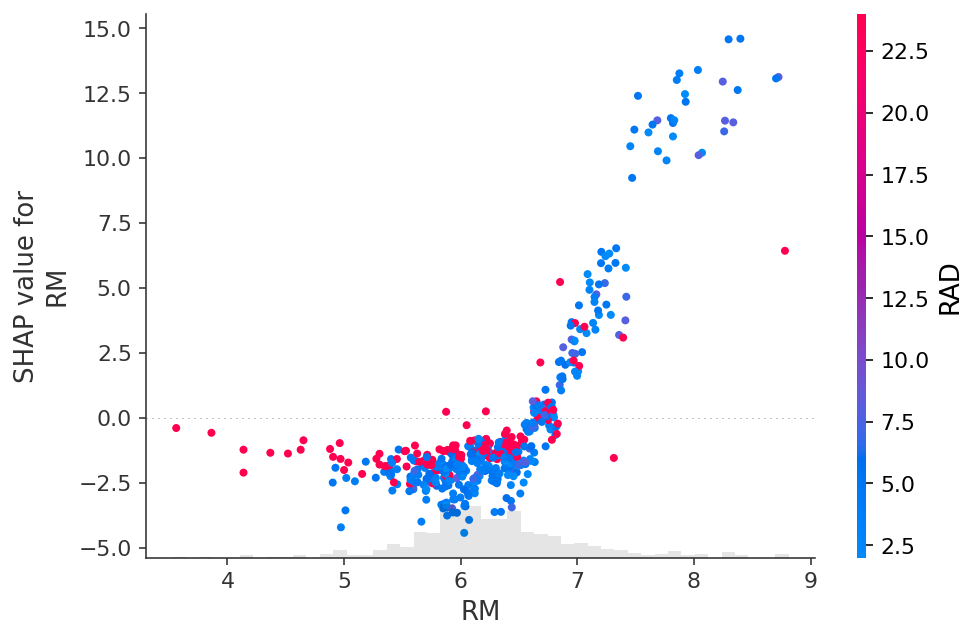

In [6]:
# visualize the first prediction's explanation
shap.plots.scatter(shap_values[:,"RM"], color=shap_values)

In [ ]:
shap.plots.scatter(shap_values[:,"RM"])

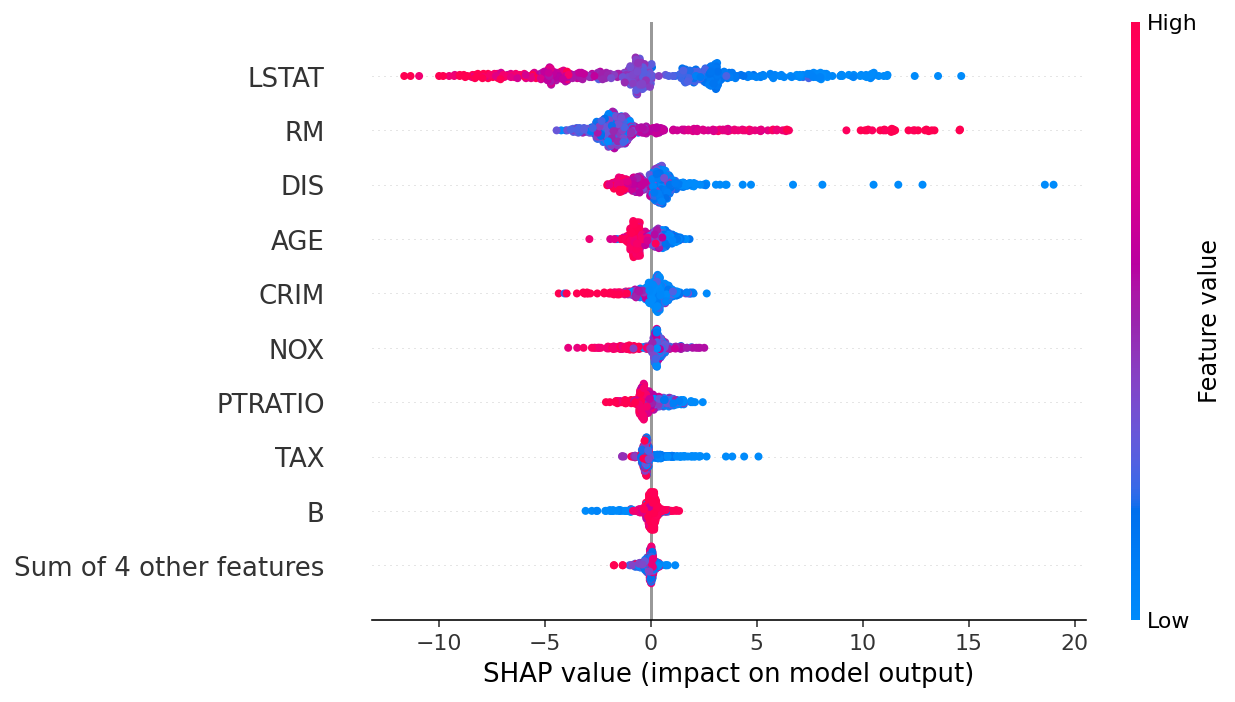

In [7]:
shap.plots.beeswarm(shap_values)

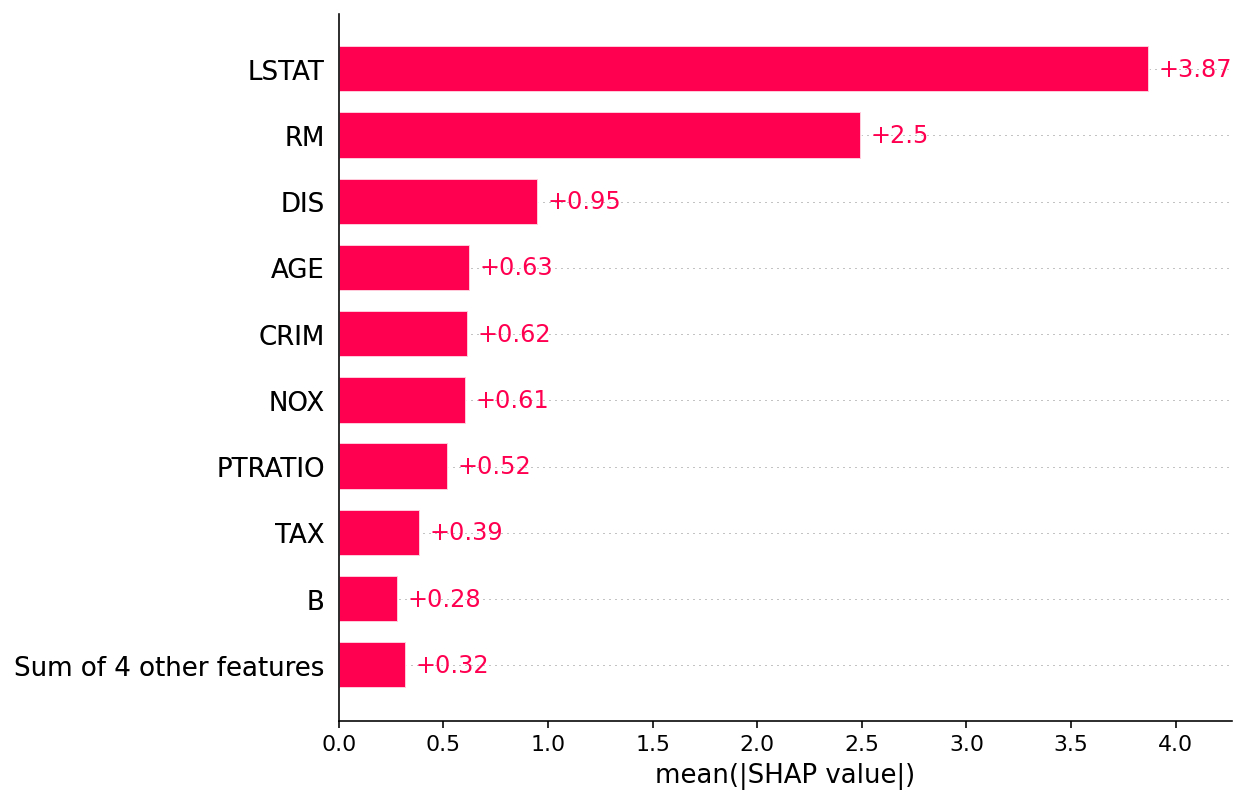

In [8]:
shap.plots.bar(shap_values)

In [2]:
shap.initjs()
shap.plots.force(shap_values[0])

In [3]:
shap.plots.force(shap_values)

In [16]:
import transformers

# load a transformers pipeline model
model = transformers.pipeline('sentiment-analysis', return_all_scores=True)

# explain the model on two sample inputs
explainer = shap.Explainer(model) 
shap_values = explainer(["What a great movie! ...if you have no taste."])

# visualize the first prediction's explanation for the POSITIVE output class
shap.plots.text(shap_values[0, :, "POSITIVE"])

In [15]:
# visualize the first prediction's explanation for the POSITIVE output class
shap.plots.text(shap_values[0, :, "POSITIVE"])

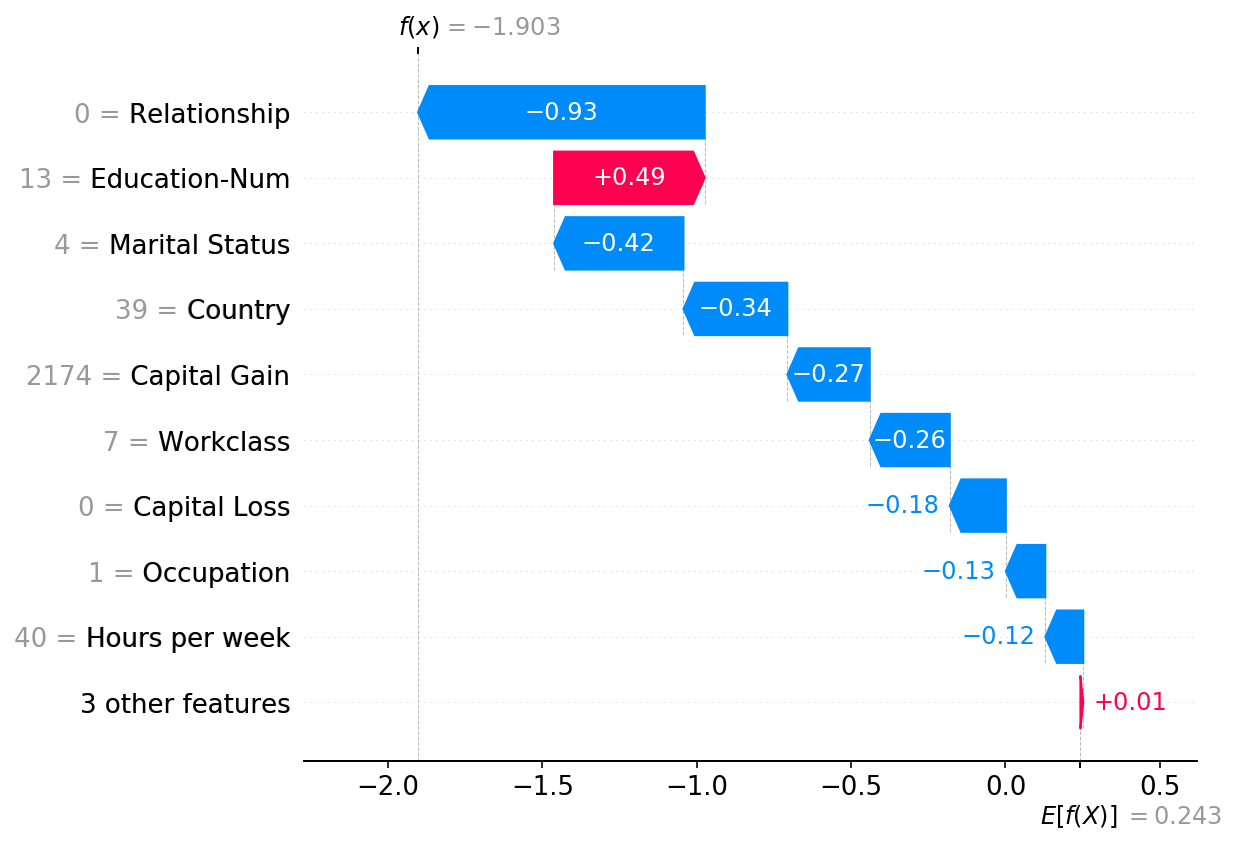

In [19]:
import xgboost
import shap

# train XGBoost model
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier(max_depth=1, learning_rate=0.5).fit(X, y)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
background = shap.maskers.TabularPartitions(X, sample=100)
def f(x):
    return shap.links.identity(model.predict_proba(x, validate_features=False)[:,1])
explainer = shap.Explainer(f, background, link=shap.links.logit)
shap_values = explainer(X[:100])

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [20]:
f(background.data).mean()

0.24263532

In [20]:
f(background.data).mean()

0.24263532

In [21]:
shap_values.expected_value

0.242635348305339

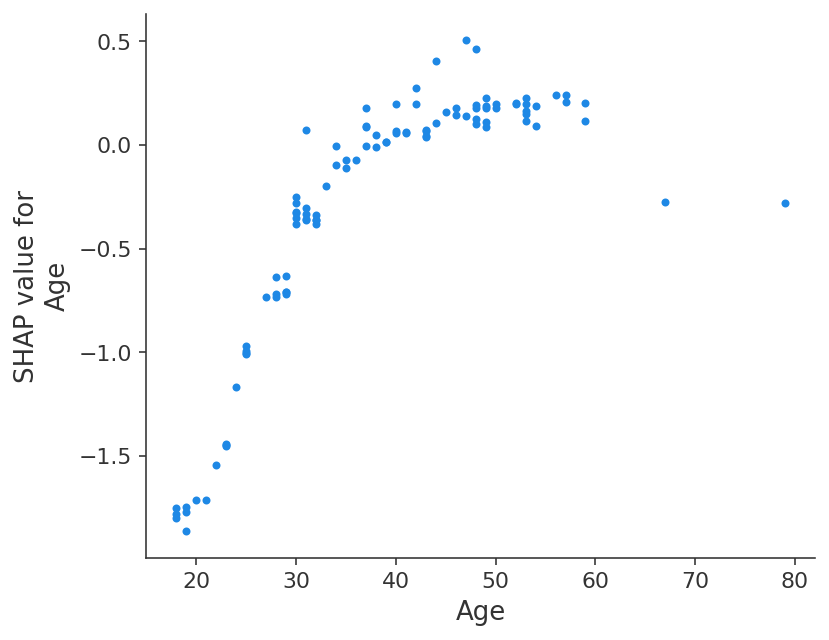

In [22]:
shap.plots.dependence(shap_values[:,"Age"])

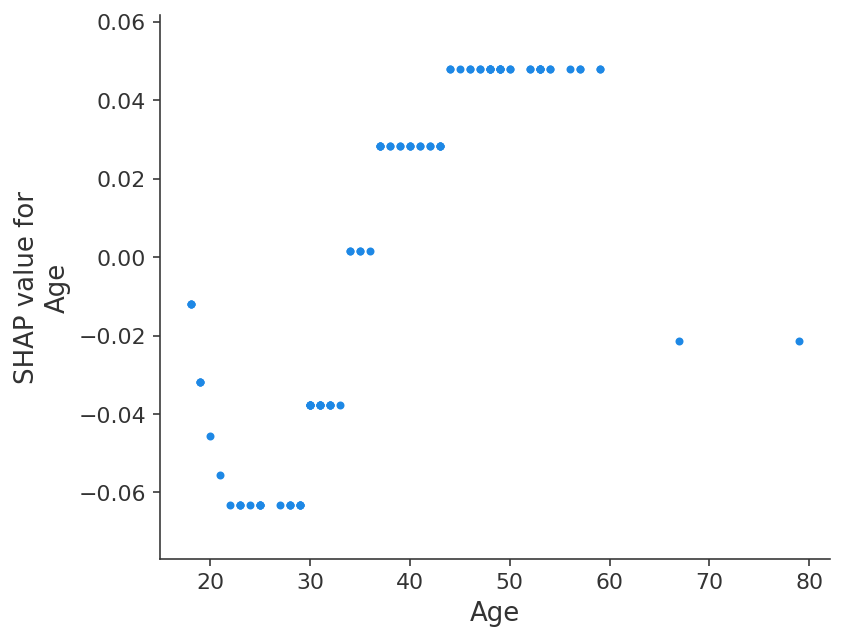

In [15]:
shap.plots.dependence(shap_values[:,"Age"])

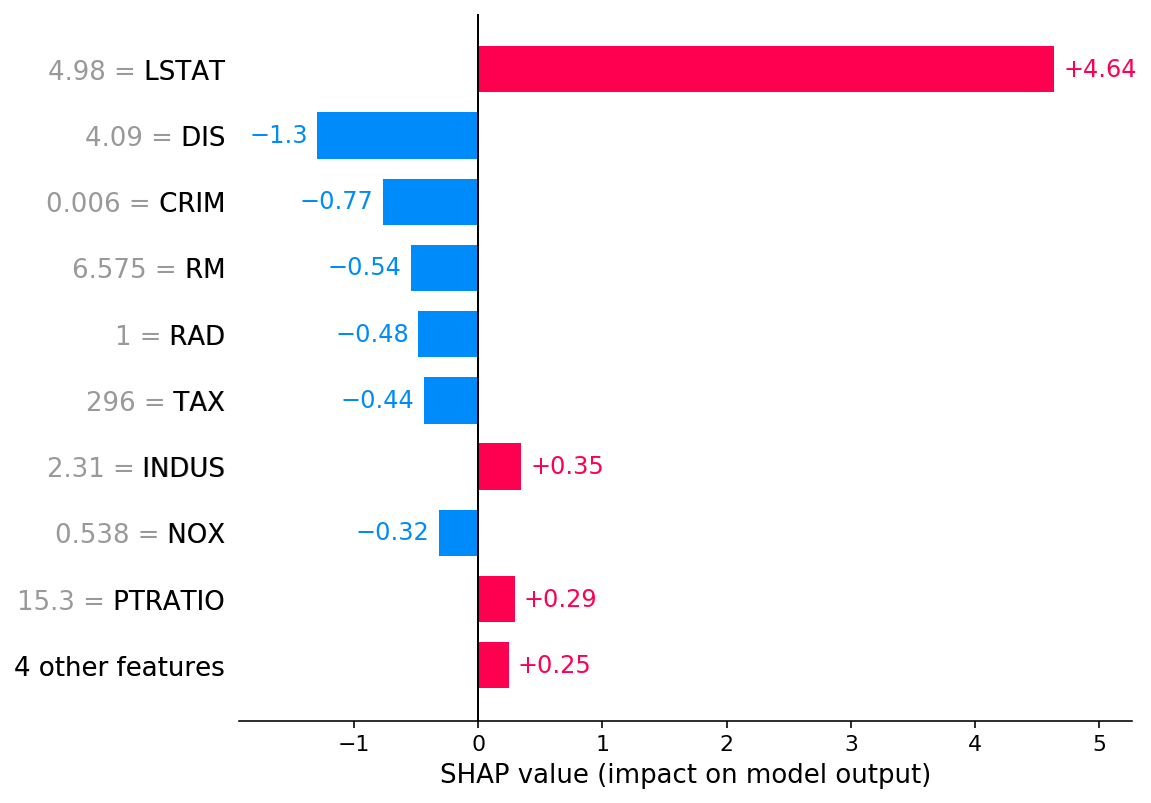

In [2]:
# plot the global importance of each feature
shap.plots.bar(shap_values[0])

In [3]:
shap.plots.initjs()

# visualize the first prediction's explanation
shap.plots.force(shap_values[0])

In [4]:
# visualize the first prediction's explanation
shap.plots.force(shap_values)

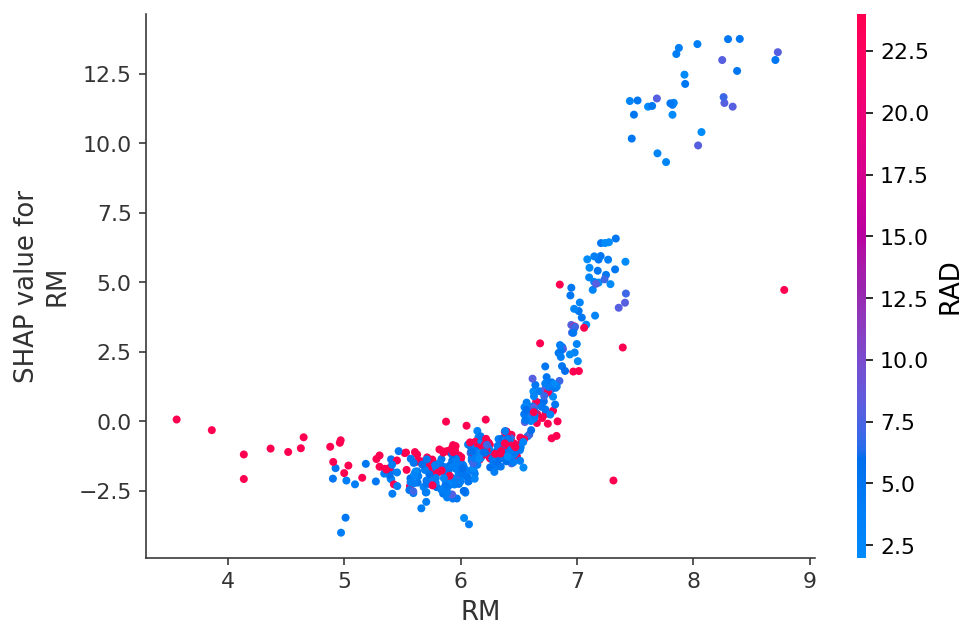

In [5]:
# plot the importance of a single feature across all samples
shap.plots.dependence(shap_values[:,"RM"], color=shap_values)

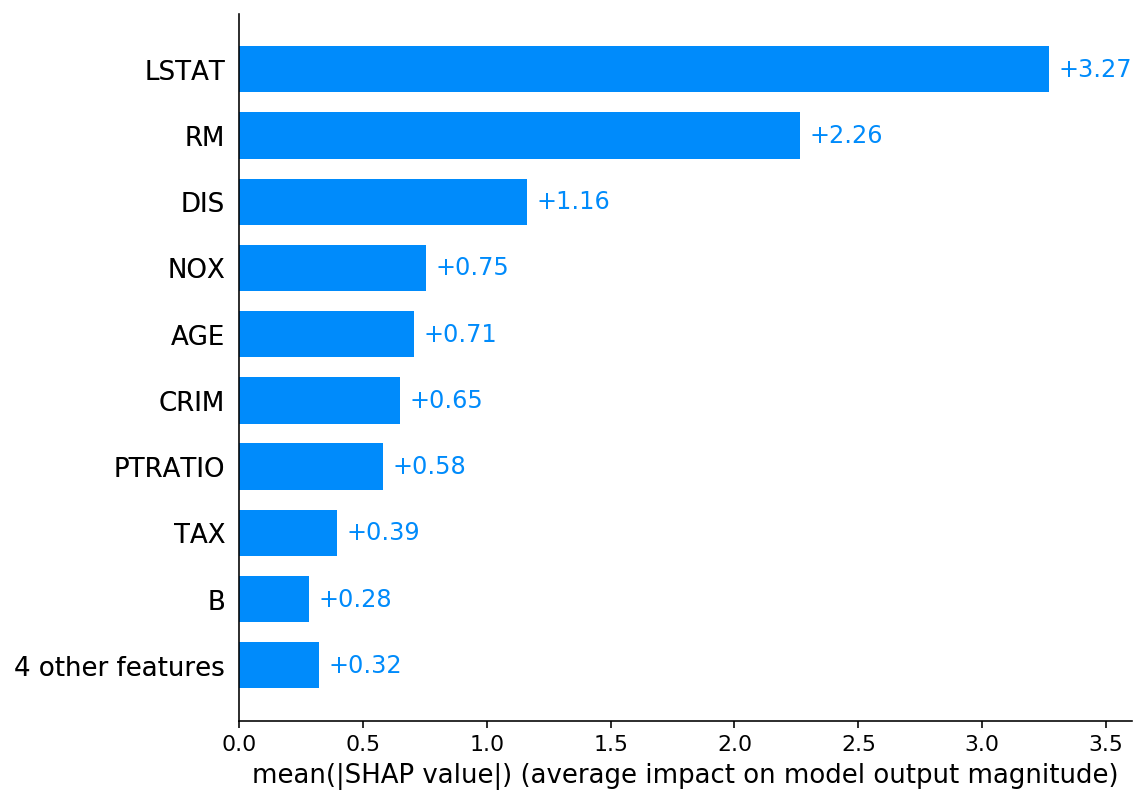

In [6]:
# plot the global importance of each feature
shap.plots.bar(shap_values)

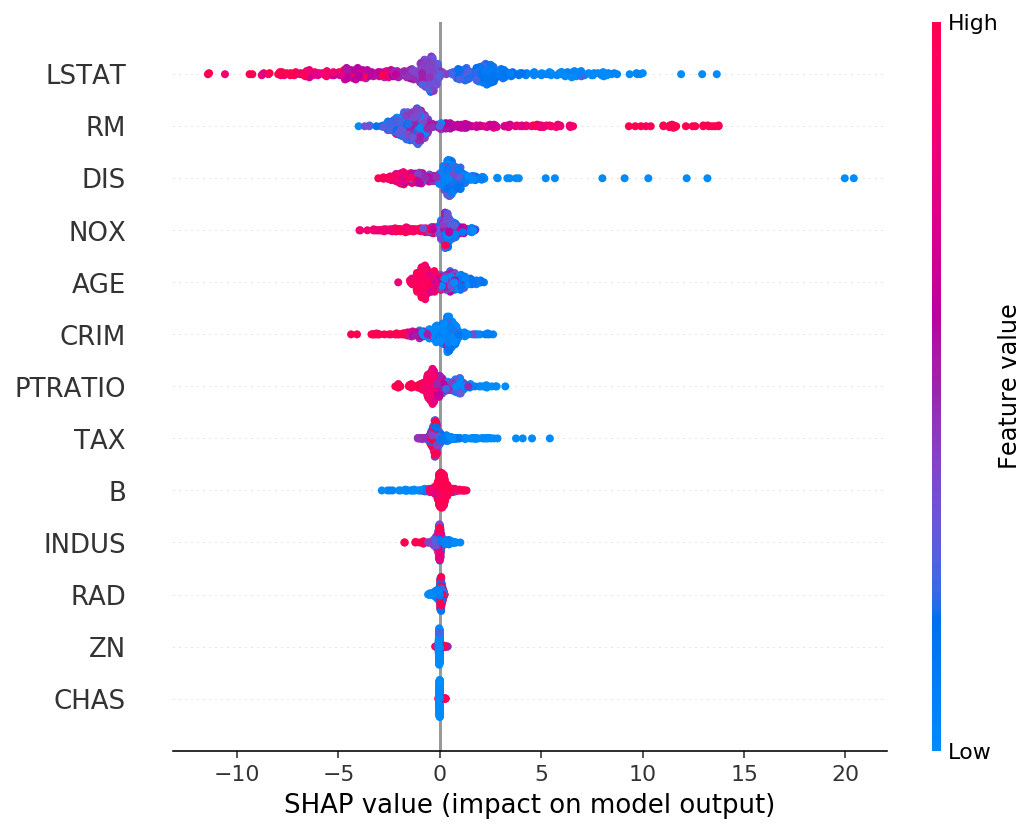

In [7]:
# plot the distribution of importances for each feature over all samples
shap.plots.summary(shap_values)